In [1]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib.image as image
import pandas as pd
from matplotlib.colors import LogNorm
import matplotlib.patches as patches

In [2]:
info = np.loadtxt('E_field/info.txt')
convert_dist=info[1] 
convert_E=info[2]
convert_vel=info[3]

# Load the csv file
df = pd.read_csv('E_field/Fields.csv')

# Convert the DataFrame to a numpy array
Field = df.values
r=Field[:,0]*convert_dist
z=Field[:,1]*convert_dist
Er=Field[:,2]*convert_E
Ez=Field[:,3]*convert_E

E = np.sqrt(Er**2 + Ez**2)


R = np.loadtxt('E_field/r.txt')*convert_dist
Z = np.loadtxt('E_field/z.txt')*convert_dist

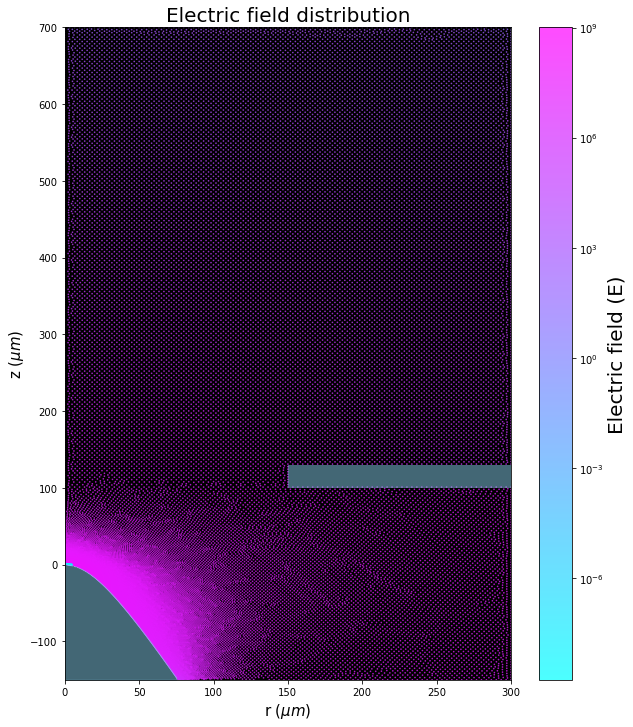

In [3]:


# Create a new figure with a black background
fig = plt.figure(figsize=(10,12), facecolor='white')
ax = fig.add_subplot(111, facecolor='black')

# Create a scatter plot
sc = ax.scatter(r*1e6, z*1e6, c=E, s=0.5, cmap='cool', norm=LogNorm(),alpha=0.7)

# Set the x and y limits to the minimum and maximum of the data
ax.set_xlim([r.min()*1e6, r.max()*1e6])
ax.set_ylim([z.min()*1e6, z.max()*1e6])

# Add a colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Electric field (E)', size=20, color='black')
cbar.ax.yaxis.set_tick_params(color='black')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='black')

# Set plot title and labels
ax.set_title('Electric field distribution', size=20, color='black')
ax.set_xlabel('r ($\mu m$)', size=15, color='black')
ax.set_ylabel('z ($\mu m$)', size=15, color='black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')


#Plot the grid surface
#gold = image.imread('gold.jpg')

# Define the 4 points of the rectangle
p1 = (150, 100)
p2 = (150, 130)
p3 = (300, 100)
p4 = (300, 130)
width = p3[0]-p1[0]
height = p2[1]-p1[1]
# patches.Rectangle() needs the bottom left point, width and height
rect = patches.Rectangle((p1[0],p1[1]), width, height, facecolor ='skyblue', alpha=0.5)
# Add the patch to the Axes
ax.add_patch(rect)
#ax.imshow(gold, extent=(p1[0], p3[0], p1[1], p2[1]), aspect='auto')

#Plot the tip of the emitter
r_tip=np.arange(0,75,0.1)
d=100
Rc=11
eta0=np.power(1+Rc/d,-1/2)
a=2*d*np.sqrt(1+Rc/d)
z_tip=100-eta0*np.sqrt(np.power(a,2)/4+np.power(r_tip,2)/(1-np.power(eta0,2)))
plt.fill_between(r_tip, z_tip,-150, color='skyblue', alpha=0.5)

# Show the plot
plt.show()

